In [1]:
%%html
<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-color:#a0cfc0;
  position: static;
}  
h2 {
  padding: 8px 12px;
  background-color:#f0cfc0;
  position: static;
}   
h3 {
  padding: 4px 8px;
  background-color:#f0cfc0;
  position: static;
}   
</style>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [3]:
from IPython.display import Image, IFrame
from IPython.core.display import HTML
from IPython.display import Latex

# Perceptron et theorie

## Perceptron linéaire

Un perceptron linéaire envoie une entrée $x \in \mathbb{R}^n$ sur une sortie $F(x) \in \mathbb{R}$. 

Cette fonction $F$ est décomposée en deux parties :

1. **fonction linéaire** : définie par $n$ poids $a_1,...,a_n$ :
$$f(x) = a_1x_1 + a_2x_2 +...+ a_n x_n$$

Exemple : $n=2$, $(a_1,a_2) = (2,3)$ ce qui permet de définir $f(x_1,x_2) = 2x_1 + 3x_2$. Cela donne par exemple $f(4,-1) = 5$.

In [9]:
x = np.array([4,-1])  #n-vector x
a = np.array([2,3])   #n weights

In [10]:
def f(x,a):
    return np.dot(x,a)

In [11]:
print(f(x,a))

5


2. **Fonction d'activation** : c'est une fonction $\varphi \colon \mathbb{R} \to \mathbb{R}$.

#### Exemple : Heaviside function

In [12]:
def H(y):
    if y<0:
        return 0
    else:
        return 1

In [13]:
H(-3)

0

In [14]:
H(f(x,a))

1

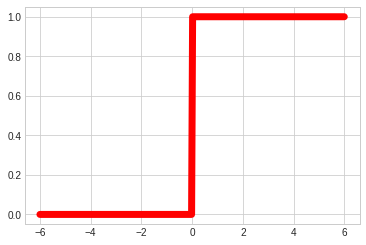

In [15]:
y = np.linspace(-6,6,300)
z = np.array([H(t) for t in y])
plt.plot(y,z,linewidth=7.0,color="red")

La sortie est un nombre $H(f(x)) \in \{0,1\}$.

#### Exemple : ReLu function

The Rectified Linear Unit function est définie ainsi :

In [16]:
def ReLu(y):
    if y<0:
        return 0
    else:
        return y

In [17]:
y = np.linspace(-6,6,300)
z = np.array([ReLu(t) for t in y])

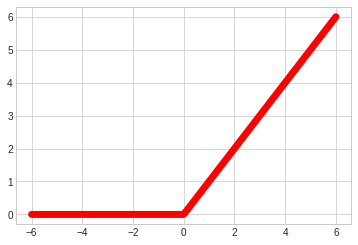

In [18]:
plt.plot(y,z,linewidth=7.0,color="red")

#### Exemple : Sigmoïd function

La fonction sigmoïde est définie ainsi :

In [19]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [20]:
y = np.linspace(-6,6,300)
z = np.array([sigmoid(t) for t in y])

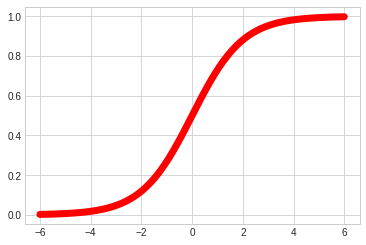

In [21]:
plt.plot(y,z,linewidth=7.0,color="red")

#### Exercice : calculer la dérivée de la fonction sigmoïde et tracer son graphe 

In [25]:
def dsigmoid(y):
    return np.exp(-y) / (1 + np.exp(-y))**2

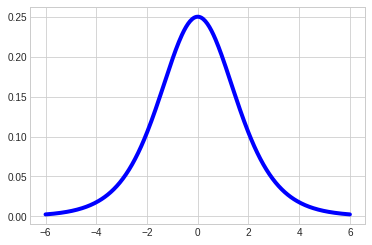

In [26]:
y = np.linspace(-6,6,300)
z = np.array([sigmoid(t) for t in y])
dz = np.array([dsigmoid(t) for t in y])
#plt.plot(y,z,linewidth=7.0,color="red")
plt.plot(y,dz,linewidth=4.0,color="blue")
plt.show()

### Neuron representation

Un perceptron linéaire peut se représenter comme un **neurone** de cette manière : <img src="img/Perceptron1.png" style="width:300px;height:150px;"> </img> 

### Exemple :

$n=2$, $(a_1,a_2) = (2,3)$ tel que $f(x_1,x_2) = 2x_1 + 3x_2$ et la fonction d'activiation Heaviside : la sortie est :

- 1 si $2x_1+3x_2 \geq 0$ ;
- 0 sinon

In [27]:
display(IFrame('https://www.geogebra.org/calculator/x63nersc?embed',900,400))

#### Exercice
Comment trouver un percpetron qui réalise la séparation des cercles bleu des cercles rouges ?
https://www.geogebra.org/calculator/zmyaznwf

In [28]:
display(IFrame('https://www.geogebra.org/calculator/zmyaznwf?embed',600,400))

## Perceptron affine

On introduit un _biais_ $a_0$ : il s'agit d'un $(n+1)$-ème poids qui définit une fonction affine $f(x_1,...,x_n) = a_1x_1+...+a_nx_n + a_0$. On le représente graphiquement comme suit :
<img src="img/Perceptron2.png" style="width:300px;height:150px;"> </img> 

Exemple : avec 2 entrées, un perceptron affine sépare un espace 2-dimensionnel en deux demi-plans.

## Théorie du perceptron

### Booléens : Or, and, xor

En informatique, une variable booléenne est une variable $x$ qui a l'une des 2 valeurs possibles (VRAI ou FAUX). Dans une algèbre booléenne, si $x$ et $y$ sont booléens, nous pouvons définir ```x OU y```.

Nous choisissons une représentation graphique : VRAI est le nombre 1, FAUX est le nombre 0, ```x OU y``` est un point avec les coordonnées $(x,y)$ dans le plan. Ce point est un carré rouge si ```x OU y = VRAI```, un cercle bleu sinon.

<img src="img/or_perceptron1.png"> </img> 

1. Puis-je réaliser cette opération ```x OU y``` avec un perceptron ?

<img src="img/or_perceptron2.png"> </img> 

Oui ! Par exemple, prenons les poids $(a_1,a_2,a_0) = (1,1,-1)$. 

2. De la même manière, puis-je réaliser l'opération ```x ET y``` avec un perceptron ?

<img src="img/and_perceptron1.png"> </img> 

Oui ! Par exemple, prenons les poids $(a_1,a_2,a_0) = (1,1,-1.5)$. 

3. De la même manière, puis-je réaliser l'opération ```x XOR y``` avec un perceptron ?

<img src="img/xor_perceptron.png"> </img> 

Non ! Vous ne pouvez pas trouver une droite qui sépare ces deux types de points.'

Le problème se résume en la question de savoir si les ensembles de points sont **linéairement séparables**.

<div class="alert alert-success" role="alert">
Dans un espace Euclidien de dimension $n$, deux ensembles de points $A$ et $B$ sont linéairement séparables si un hyperplan peut séparer l'espace : il existe $a_1,...,a_n,a_0$ tel que pour chaque $x \in A$, $\sum_{i=1}^n a_i x_i + a_0 > 0$ et pour chaque $x \in B$, $\sum_{i=1}^n a_i x_i + a_0 < 0$.  
    Une autre façon de le dire est que leurs enveloppes convexes respectives sont disjointes.
</div>

<div class="alert alert-danger" role="alert">	

Dans un espace Euclidien de dimension $n$, deux ensembles de points $A$ et $B$ sont linéairement séparables s'il existe un perceptron qui prend la valeur 1 sur $A$ et 0 sur $B$.
</div>



Un perceptron est un **classifieur linéaire**.

#### Exercice 

Est-il possible de réaliser l'opération ```x OR y OR z``` avec un percpetron ?

Réponse : 

<img src="img/or_or_perceptron.png"> </img> 

### Wow, your perceptron is learning for the first time !

#### Learning rule

This learning rule is an example of supervised training, in which the learning rule is provided
with a set of examples of proper perecptron behavior: a collection of $(x,t)$ where $x$ is an input and $t$ is a the corresponding target output. As each input is applied to the network, the network output is compared
to the target. **The learning rule then adjusts the weights and biases
of the perceptron in order to move the perceptron output closer to the target.**

#### Test problem
These are 3  input/target pairs for our test problem :
$$x_1 = (1,2) \,;\, t_1 = 1 \qquad x_2 = (-1,2) \,;\, t_2 = 0 \qquad x_3 = (0,-1) \,;\, t_3 = 0$$

The perceptron for this problem should have two-inputs and one output. To
simplify our development of the learning rule, we will begin with a network
without a bias so that we are looking for two weights $a_1,a_2$. Activation function is Heaviside.

In [ ]:
x=[];t=[]
x.append(np.array([1,2])) ; t.append(1)
x.append(np.array([-1,2])) ; t.append(0)
x.append(np.array([0,-1])) ; t.append(0)

#### Constructing Learning Rules
We set the weight vector $w = (a_1,a_2)$ to the following randomly generated values: $w = (1.0, -0.8)$. 

Then we execute the perceptron with the first input $x_1$ : output $y_1$ is equal to $0 \neq t_1$.



In [ ]:
w = np.array([1.0,-0.8])
y = sum(w*x[0])
print(y)
y = H(y)
print(y)
y == t[0] #test if output y_1 is equal to t_1

**Rule** : if $t=1$ and $y=0$ then $w_{new} := w_{old} + x$.

Then we execute the perceptron with the second input $x_2$ and new weights:

In [ ]:
w = w + x[0]
y = H(sum(w*x[1]))
y == t[1]

**Rule** : if $t=0$ and $y=1$ then $w_{new} := w_{old} - x$.

Then we execute the perceptron with the second input $x_3$ and new weights:

In [ ]:
w = w - x[1]
y = H(sum(w*x[2]))
y == t[2]

In [ ]:
y - t[2]

We apply the previous rule :

In [ ]:
w = w - x[2]


Then we check :

In [ ]:
for i in range(3):
    y = H(sum(w*x[i]))
    print(y == t[i])

#### Unfying Learning Rules


This rule can be extended to train the bias by noting that a bias is simply
a weight whose input is always 1.

#### Exercise :
Write a program that applies all the rules given above with different weights at start. Check the result.

Bonus : Represent with a 2d-graph the evolution of $w$ by plotting the corresponding linear classifyer.  

In [ ]:
n = len(x)
w = np.array([-0.5,-0.9])
for i in range(n):
    y = H(sum(w*x[i]))
    err = t[i]-y
    w = w + err * x[i]
for i in range(3):
    y = H(sum(w*x[i]))
    print(y == t[i])